In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_theta_genie_other/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/genie_other/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_flux_momentum.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Flux variation, systematic

In [4]:
# Load input files
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"genie_other_theta_systematic.root","RECREATE");


In [5]:
filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
pot_overlay= 1.22339196540357653e+21
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.24025430537e+21
Overlay:	1.2233919654e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.00624820189781
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [7]:
if 1:
    filename_overlay = filename_overlay+'out33.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out33.root'
    filename_ext = filename_ext+'out33.root'
    filename_dirt = filename_dirt+'out33.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	0
Data: Number of Entries:	0
Ext: Number of Entries:		0
Dirt: Number of Entries:	0



Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_overlay_V26_weight.rootout33.root does not exist
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_data_V25.rootout33.root does not exist
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_ext_V25.rootout33.root does not exist
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_dirt_V26_weight.rootout33.root does not exist


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [12]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [13]:
'''variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_overlay_mom = ROOT.TH1F('h_overlay_mom','h_overlay_mom',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_mom',weight_name+'*('+cut+')')
h_overlay.Scale(globale.scale[globale.overlay])
bkg_dirt = h_dirt_mom.GetSumOfWeights()

print 'Overlay: ', num_data,
'''

"variable = 'TrackMomMCS_mom'\ncut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'\n\nh_overlay_mom = ROOT.TH1F('h_overlay_mom','h_overlay_mom',binnum,array('f',mom_bins))\nglobale.overlay_out.Draw(variable+'>>h_overlay_mom',weight_name+'*('+cut+')')\nh_overlay.Scale(globale.scale[globale.overlay])\nbkg_dirt = h_dirt_mom.GetSumOfWeights()\n\nprint 'Overlay: ', num_data,\n"

In [14]:
#weight_list = {}
'''weight_list_all = [ 'All_Genie', 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'TunedCentralValue_Genie',\
    'VecFFCCQEshape_Genie', 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation', 'splines_general_Spline' ]'''

#weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
#    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
#    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
#    'piplus_PrimaryHadronSWCentralSplineVariation' ]
weight_list_flux = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]
num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para
#weight_list_genie_other = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]

Nuber of parameters:  5


In [15]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 2
eff_uni = np.zeros((num_para,num_universes))
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1

In [16]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [17]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_genie_other/pc46/script_output/'
f = ROOT.TFile.Open(path+"Genie_other_theta.root", 'read')
#h_data_mom = f.Get("h_data_mom")
#h_data_mom.Draw()
#c1.Draw()
#h_data_mom.GetEntries()

In [18]:

h_ext_mom = f.Get("h_ext_mom")
h_data_mom = f.Get("h_data_mom")
h_dirt_mom = f.Get("h_dirt_mom")

bkg_ext = h_ext_mom.Integral(0,binnum)
num_data = h_data_mom.Integral(0,binnum)
bkg_dirt = h_dirt_mom.Integral(0,binnum)

print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt


Data:  1348.0  Ext:  142.179031849  Dirt:  32.1298258305


In [19]:

variable = 'MCle_Energy'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_1d = []
h_1d_true = []

for para in range(num_para):
    h_1d.append([])
    h_1d_true.append([])
    for uni in range(num_universes):
        h_1d[para].append(f.Get('h_1d['+str(para)+']['+str(uni)+']'))
        h_1d_true[para].append( f.Get('h_1d_true['+str(para)+']['+str(uni)+']' ))

for para in range(num_para): 
    print 'Get efficiency of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        #globale.overlay_out.Draw(variable+'>>h_1d['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*('+cut+'&& numu_signal)')
        #globale.overlay_out.Draw(variable+'>>h_1d_true['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*(numu_true)')
        num_signal = h_1d[para][uni].Integral(0,binnum+1)
        num_true = h_1d_true[para][uni].Integral(0,binnum+1)
        eff_uni[para][uni] = num_signal/(num_true+0.0001)
        #h_1d[para][uni].Write('h_1d['+str(para)+']['+str(uni)+']')
        #h_1d_true[para][uni].Write('h_1d_true['+str(para)+']['+str(uni)+']')
        print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' number of signal: ', num_signal,' True: ', num_true,' Eff: ',eff_uni[para][uni]
# save the efficiencies
#np.save(output_filedir+'xsec_flux_tot_efficiencies',eff_uni)
print 'Total std of efficiency (all parameters, all universes)',eff_uni.std()

Get efficiency of Parameter:  AxFFCCQEshape_Genie
Parameter:  AxFFCCQEshape_Genie  Universe:  0  number of signal:  156293.918457  True:  297005.158203  Eff:  0.5262330100594309
Parameter:  AxFFCCQEshape_Genie  Universe:  1  number of signal:  156164.023438  True:  297022.017578  Eff:  0.5257658158080755
Get efficiency of Parameter:  DecayAngMEC_Genie
Parameter:  DecayAngMEC_Genie  Universe:  0  number of signal:  156368.342773  True:  297690.064453  Eff:  0.5252722928733565
Parameter:  DecayAngMEC_Genie  Universe:  1  number of signal:  156164.023438  True:  297022.017578  Eff:  0.5257658158080755
Get efficiency of Parameter:  MaNCRES_Genie
Parameter:  MaNCRES_Genie  Universe:  0  number of signal:  156170.341797  True:  297042.550781  Eff:  0.525750742893761
Parameter:  MaNCRES_Genie  Universe:  1  number of signal:  156157.69043  True:  297000.679688  Eff:  0.5257822660251694
Get efficiency of Parameter:  Theta_Delta2Npi_Genie
Parameter:  Theta_Delta2Npi_Genie  Universe:  0  number 

In [20]:
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

bkg_uni = np.zeros((num_para,num_universes))
h_1d_bkg = []
for para in range(num_para):
    h_1d_bkg.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_bkg[para].append( f.Get('h_1d_bkg['+str(para)+']['+str(uni)+']') )

for para in range(num_para):
    print 'Get background of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        #globale.overlay_out.Draw(variable+'>>h_1d_bkg['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list_flux[para]+'['+str(uni)+']*('+cut+'&& !numu_signal)')
        #h_1d_bkg[para][uni].Scale(globale.scale[globale.overlay])
        bkg_uni[para][uni] = h_1d_bkg[para][uni].Integral(0,binnum+1)
        #h_1d_bkg[para][uni].Write('h_1d_bkg['+str(para)+']['+str(uni)+']')
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Overlay: ',bkg_uni[para][uni]


Get background of Parameter:  AxFFCCQEshape_Genie
Get background of Parameter:  DecayAngMEC_Genie
Get background of Parameter:  MaNCRES_Genie
Get background of Parameter:  Theta_Delta2Npi_Genie
Get background of Parameter:  VecFFCCQEshape_Genie


In [21]:
xsec_uni = np.zeros((num_para,num_universes))
       
xsec_std = np.zeros((num_para))
xsec_mean = np.zeros((num_para))
xsec_diff = np.zeros((num_para))
#xsec_CV = 8.00835474027e-39 #7.6770041506e-39
xsec_diff_tot = 0
print num_data,bkg_ext,bkg_dirt,N_tot,beam_flux


for para in range(num_para):
    for uni in range(num_universes):
        signal = num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni]
        xsec_uni[para][uni] = (num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni])/(eff_uni[para][uni] * N_tot * beam_flux)
        #globale.overlay_out.Draw(variable+">>h_1d_bkg["+str(uni)+']',weight_name+'*All_Genie['+str(uni)+']*('+cut+'&& !numu_signal)')
        #h_1d_xsec[uni].Scale(globale.scale[globale.overlay])
        #xsec_uni[uni] = h_1d_bkg[uni].GetSumOfWeights()
        print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Total fulux integrated xsec: ',xsec_uni[para][uni]
    xsec_diff[para] = (xsec_uni[para][0] - xsec_uni[para][1])
    print 'Parameter: %45s'% weight_list_flux[para], ' mean: {0:0.3e}%'.format(xsec_uni[para][1]), ' deviation: {0:0.3e}%'.format(xsec_uni[para][0]-xsec_uni[para][1]),' in percent: {0:0.3f}%'.format(xsec_uni[para][0]*100.0/xsec_uni[para][1]-100,'%')
    xsec_diff_tot = xsec_diff_tot + xsec_diff[para]*xsec_diff[para]
    
xsec_diff_tot = math.sqrt(xsec_diff_tot)
print 'Total flux errorin percent: {0:0.5f}%'.format(xsec_diff_tot*100.0/xsec_uni[0][1],'%')

1348.0 142.179031849 32.1298258305 4.10331109202e+31 5640491186.57
Parameter:  AxFFCCQEshape_Genie  Universe:  0  Total fulux integrated xsec:  8.004883680638745e-39
Parameter:  AxFFCCQEshape_Genie  Universe:  1  Total fulux integrated xsec:  8.009652421478051e-39
Parameter:                           AxFFCCQEshape_Genie  mean: 8.010e-39%  deviation: -4.769e-42%  in percent: -0.060%
Parameter:  DecayAngMEC_Genie  Universe:  0  Total fulux integrated xsec:  8.011898982236693e-39
Parameter:  DecayAngMEC_Genie  Universe:  1  Total fulux integrated xsec:  8.009652421478051e-39
Parameter:                             DecayAngMEC_Genie  mean: 8.010e-39%  deviation: 2.247e-42%  in percent: 0.028%
Parameter:  MaNCRES_Genie  Universe:  0  Total fulux integrated xsec:  7.943049804833306e-39
Parameter:  MaNCRES_Genie  Universe:  1  Total fulux integrated xsec:  8.073133323264227e-39
Parameter:                                 MaNCRES_Genie  mean: 8.073e-39%  deviation: -1.301e-40%  in percent: -1.61

In [22]:

h_eff_true = []
h_eff_tilde = []
for para in range(num_para):
    h_eff_tilde.append([])
    h_eff_true.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_eff_tilde[para].append( f.Get('h_eff_tilde['+str(para)+']['+str(uni)+']') ) 
        h_eff_true[para].append( f.Get('h_eff_true['+str(para)+']['+str(uni)+']') ) 

In [23]:
# save the total difference in percent
#np.save(output_filedir+'xsec_percent_diff_momentum',xsec_std_bin)

In [24]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [25]:
# load CV values
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path+"xsec_theta_wighted.root", 'read')
h_cv = f_cv.Get("h_xsec_data_theta")
h_cv.Scale(1e-38)


In [26]:
h_1d_xsec = []
print num_universes
for para in range(num_para):
    h_1d_xsec.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_xsec[para].append( ROOT.TH1F('h_1d_xsec['+str(para)+']['+str(uni)+']',"xsec momentum",binnum,array('f',mom_bins)) )

legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT

for para in range(num_para):#num_para
    for uni in range(num_universes):    #num_universes 
        #xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)
        #xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(eff_tilde[i] * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))
        h_1d_xsec[para][uni] = h_data_mom.Clone()
        h_1d_xsec[para][uni].Add(h_ext_mom,-1)
        h_1d_xsec[para][uni].Add(h_dirt_mom,-1)
        h_1d_xsec[para][uni].Add(h_1d_bkg[para][uni],-1)
        h_1d_xsec[para][uni].Scale(1.0/(N_tot * beam_flux ))
        h_1d_xsec[para][uni].SetLineColor(para+2)
        h_1d_xsec[para][uni].SetLineWidth(3)
        h_1d_xsec[para][uni].Divide(h_eff_tilde[para][uni])
        for i in range(1,binnum+1):
            value = h_1d_xsec[para][uni].GetBinContent(i)
            width = h_1d_xsec[para][uni].GetBinWidth(i)
            h_1d_xsec[para][uni].SetBinContent(i,value/(width))
            h_1d_xsec[para][uni].SetBinError(i,h_1d_xsec[para][uni].GetBinError(i)/(width))
            #if i == 2:
            #print value/width, value, width
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
        

2


In [27]:
for i in range(1,binnum+1):
    print h_1d_xsec[para][uni].GetBinContent(i),h_1d_xsec[para][uni].GetBinError(i)

1.13935374239e-39 2.50674494076e-40
1.60872146561e-39 2.5743552303e-40
2.84457142285e-39 4.20386509955e-40
3.72512355576e-39 5.15347614158e-40
5.21450343765e-39 6.04770487964e-40
8.51941822162e-39 7.7042743683e-40
1.13656487818e-38 9.7612876217e-40
1.64133304399e-38 1.33290487109e-39
1.71565721389e-38 1.43736428663e-39


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_1d_bkgd_theta_genie_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_1d_bkgd_theta_genie_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_1d_bkgd_theta_genie_other.pdf has been created


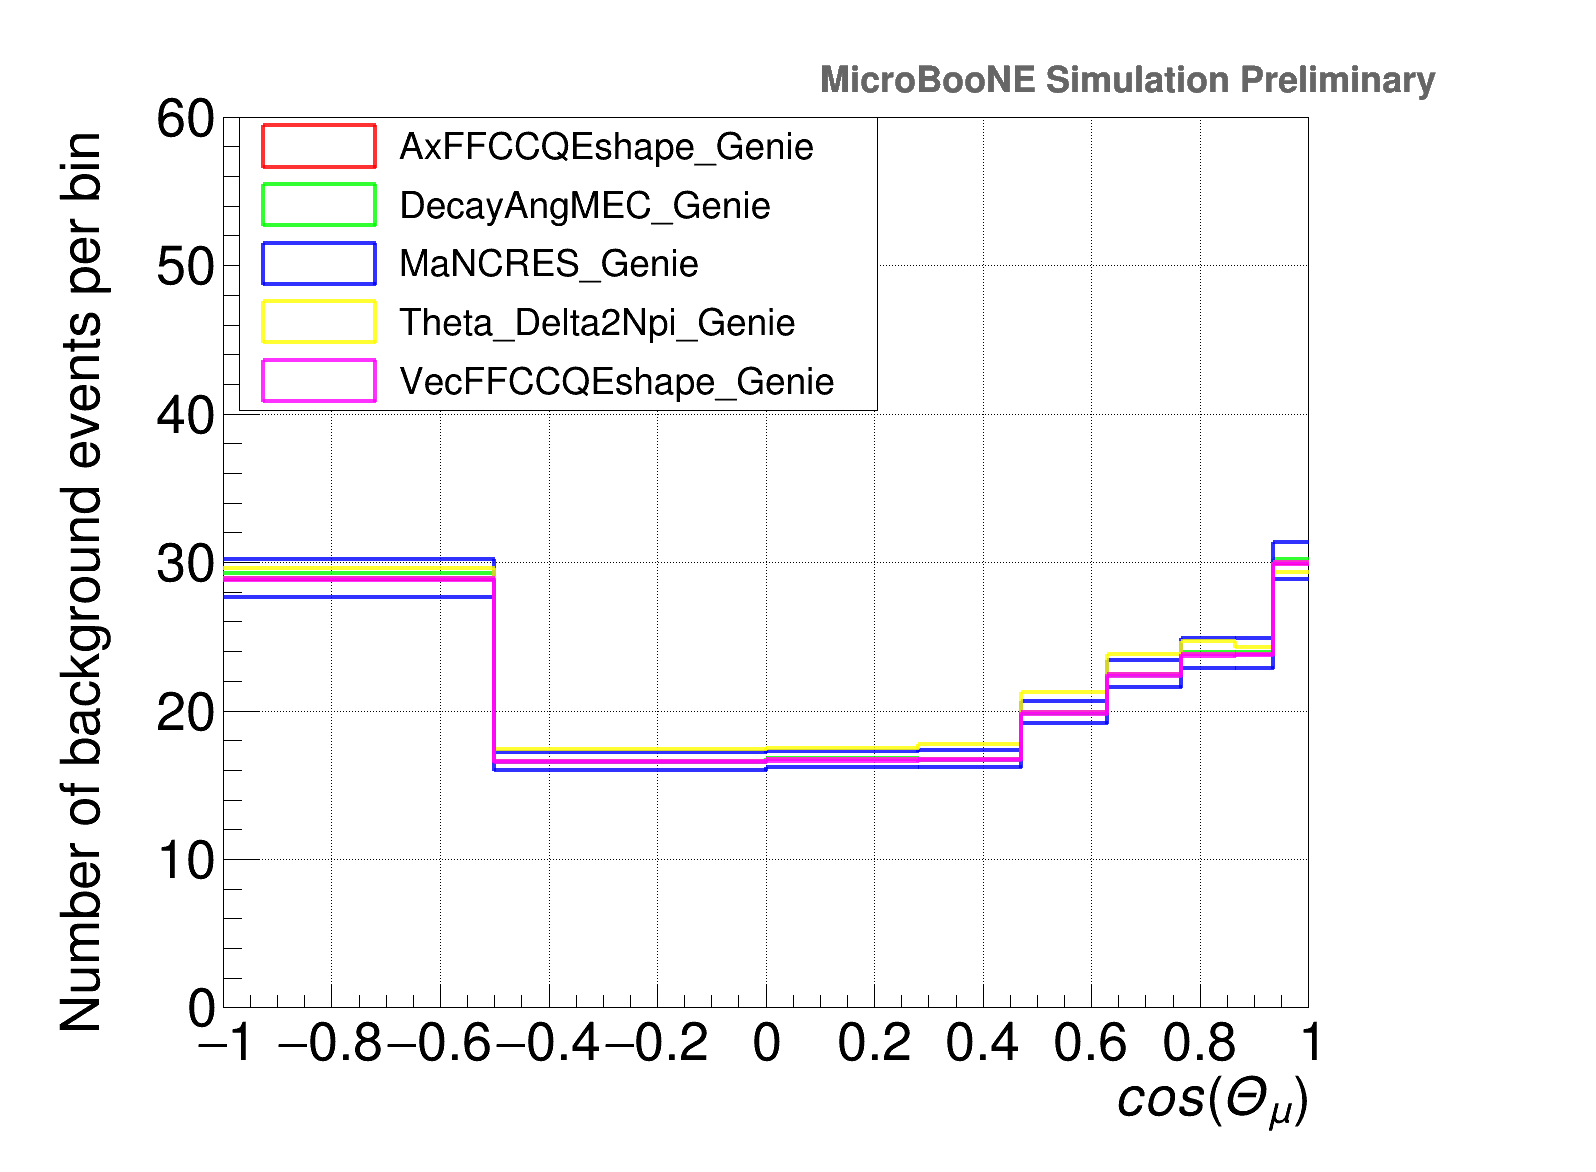

In [28]:
#legend.AddEntry(h_cv,'CV',"f")
#h_cv.SetLineWidth(3)
legend = ROOT.TLegend(0.15,0.65,0.55,0.9); #LEGEND RIGHT
h_1d_bkg[0][0].SetYTitle("Number of background events per bin")
h_1d_bkg[0][0].SetXTitle("cos(\Theta_{\mu})")
h_1d_bkg[0][0].GetYaxis().SetTitleSize(0.05)
h_1d_bkg[0][0].GetYaxis().SetTitleOffset(0.0)
h_1d_bkg[0][0].GetYaxis().SetLabelSize(0.05)
h_1d_bkg[0][0].GetXaxis().SetTitleSize(0.05)
h_1d_bkg[0][0].GetXaxis().SetLabelSize(0.05)
h_1d_bkg[0][0].GetXaxis().SetTitleOffset(1)
h_1d_bkg[0][0].SetLineColor(ROOT.kBlack)
h_1d_bkg[0][0].SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
h_1d_bkg[0][0].Draw('HIST')
for para in range(num_para):
    legend.AddEntry(h_1d_bkg[para][uni],weight_list_flux[para],"f")
    for uni in range(num_universes):      
        h_1d_bkg[para][uni].SetLineColorAlpha(para+2,0.8)
        h_1d_bkg[para][uni].SetLineWidth(4)
        h_1d_bkg[para][uni].SetMaximum(60)
        h_1d_bkg[para][uni].SetMinimum(0)
    
        h_1d_bkg[para][uni].Draw('HIST same ')
        #h_1d_xsec[para][uni]..SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
legend.Draw()
#h_cv.Draw('HIST E1 same')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_bkgd_theta_genie_other.png")
c1.SaveAs(outputdir_root + "h_1d_bkgd_theta_genie_other.root")
c1.SaveAs(outputdir_pdf + "h_1d_bkgd_theta_genie_other.pdf")


In [29]:
xsec_cov_matrix = np.zeros((binnum,binnum)) # covariance matrix
xsec_corr_matrix = np.zeros((binnum,binnum)) # correlation matrix
xsec_frac_cov_matrix = np.zeros((binnum,binnum)) # fractional covariance matrix

for para in range(num_para):#num_para
    for uni in range(num_universes):    #num_universes 
        xsec_diff_matrix = np.zeros((binnum))
        xsec_diff_matrix_1 = np.zeros((binnum))
        for i in range(1,binnum+1):
            xsec_var = h_1d_xsec[para][uni].GetBinContent(i)
            xsec_cv = h_cv.GetBinContent(i)
            xsec_diff_matrix[i-1] = xsec_var - xsec_cv
            xsec_diff_matrix_1[i-1] = (xsec_var - xsec_cv)/(xsec_cv+1e-80)
        xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(binnum,1) * xsec_diff_matrix
        xsec_frac_cov_matrix = xsec_frac_cov_matrix + xsec_diff_matrix_1.reshape(binnum,1) * xsec_diff_matrix_1
for i in range(binnum):
    for j in range(binnum):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))
    

In [30]:
RootFile = ROOT.TFile(output_filedir+"genie_other_theta_systematic.root","RECREATE");

872

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_covariance_genie_other_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_covariance_genie_other_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_covariance_genie_other_theta.pdf has been created


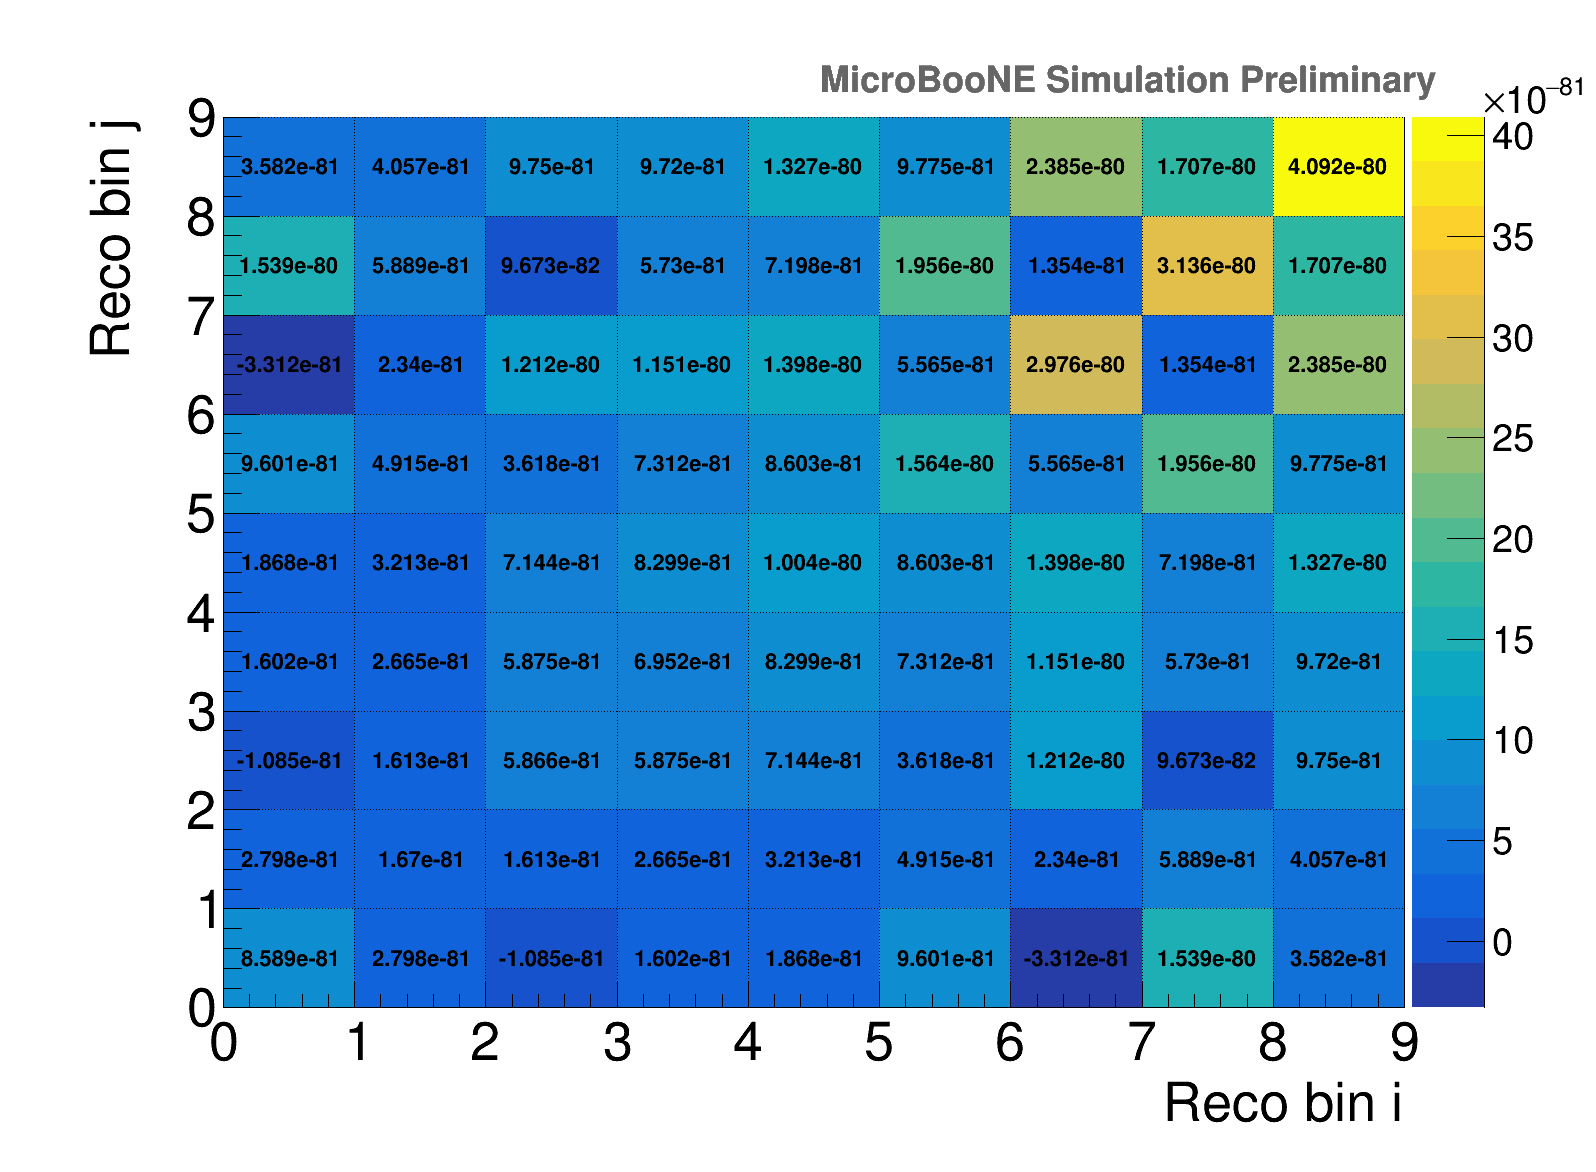

In [31]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_genie_other_theta.png")
c1.SaveAs(outputdir_root + "h_covariance_genie_other_theta.root")
c1.SaveAs(outputdir_pdf + "h_covariance_genie_other_theta.pdf")
h_covariance.Write('h_covariance')

967

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_frac_covariance_genie_other_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_frac_covariance_genie_other_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_frac_covariance_genie_other_theta.pdf has been created


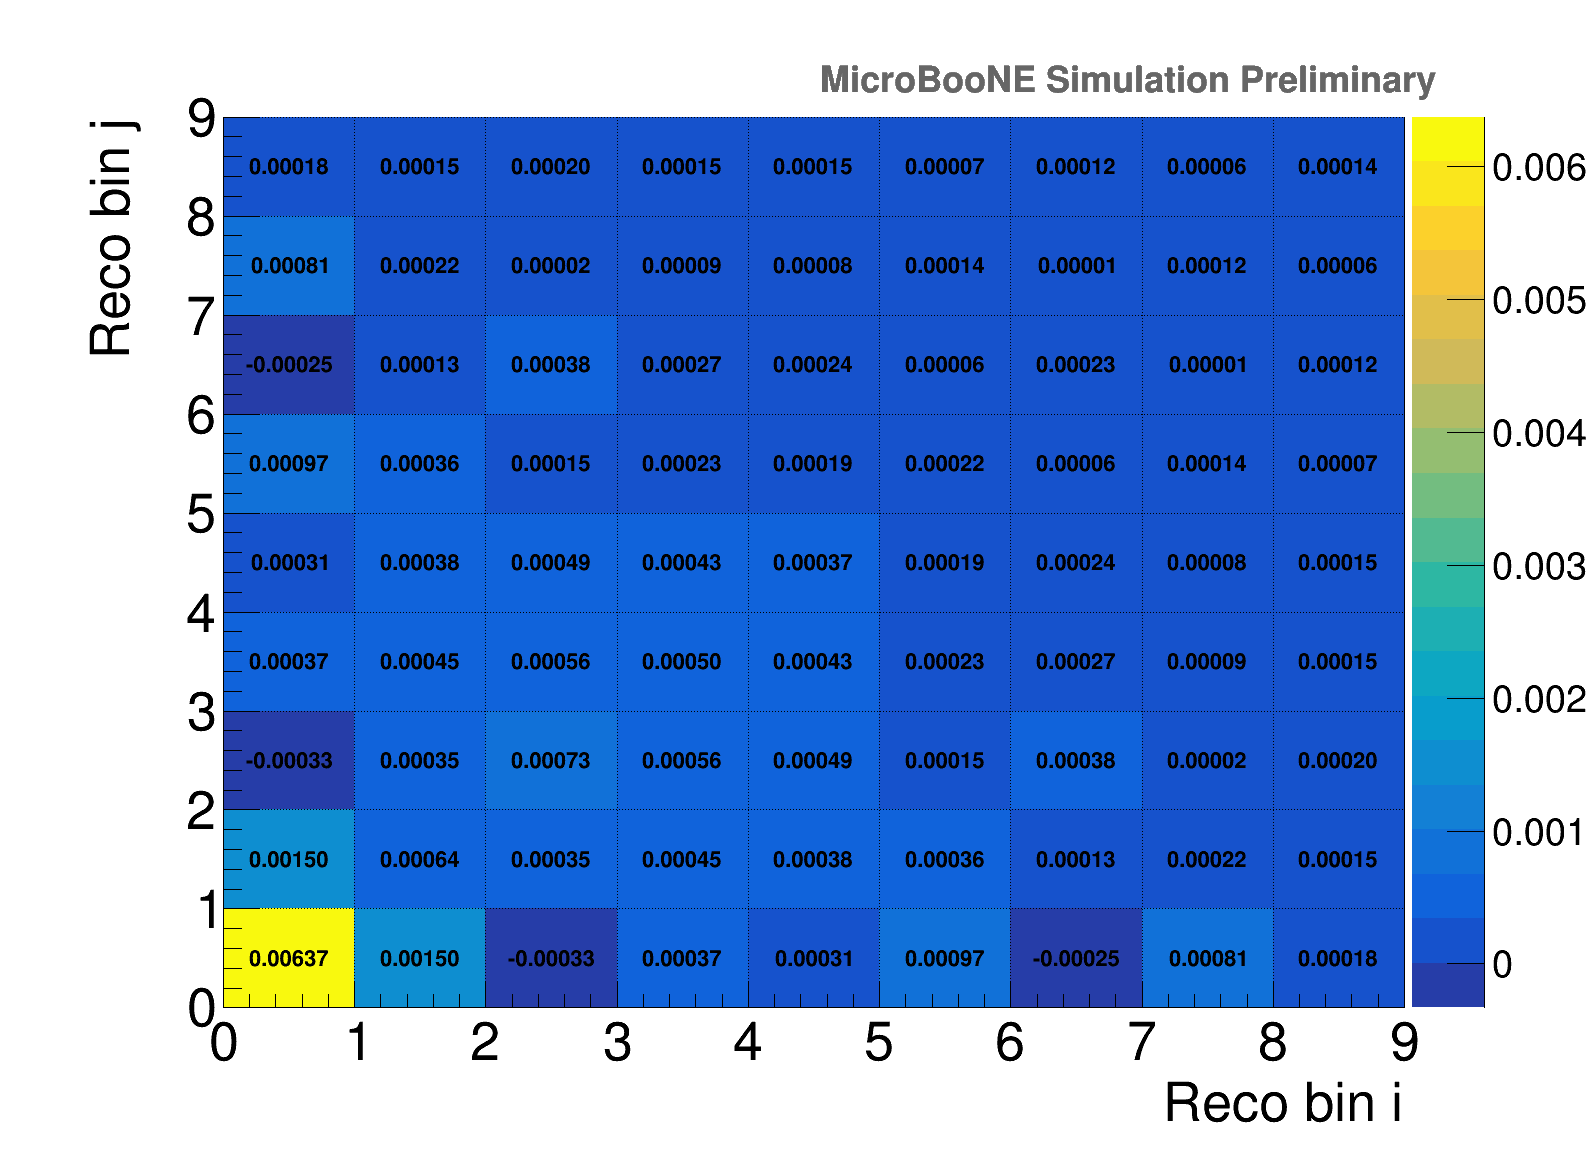

In [32]:
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_frac_covariance = ROOT.TH2D("h_frac_covariance",'Fractional covariance matrix',9,0,9,9,0,9)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_frac_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_genie_other_theta.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_genie_other_theta.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_genie_other_theta.pdf")
h_covariance.Write('h_frac_covariance')

918

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_correlation_genie_other_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_correlation_genie_other_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_correlation_genie_other_theta.pdf has been created


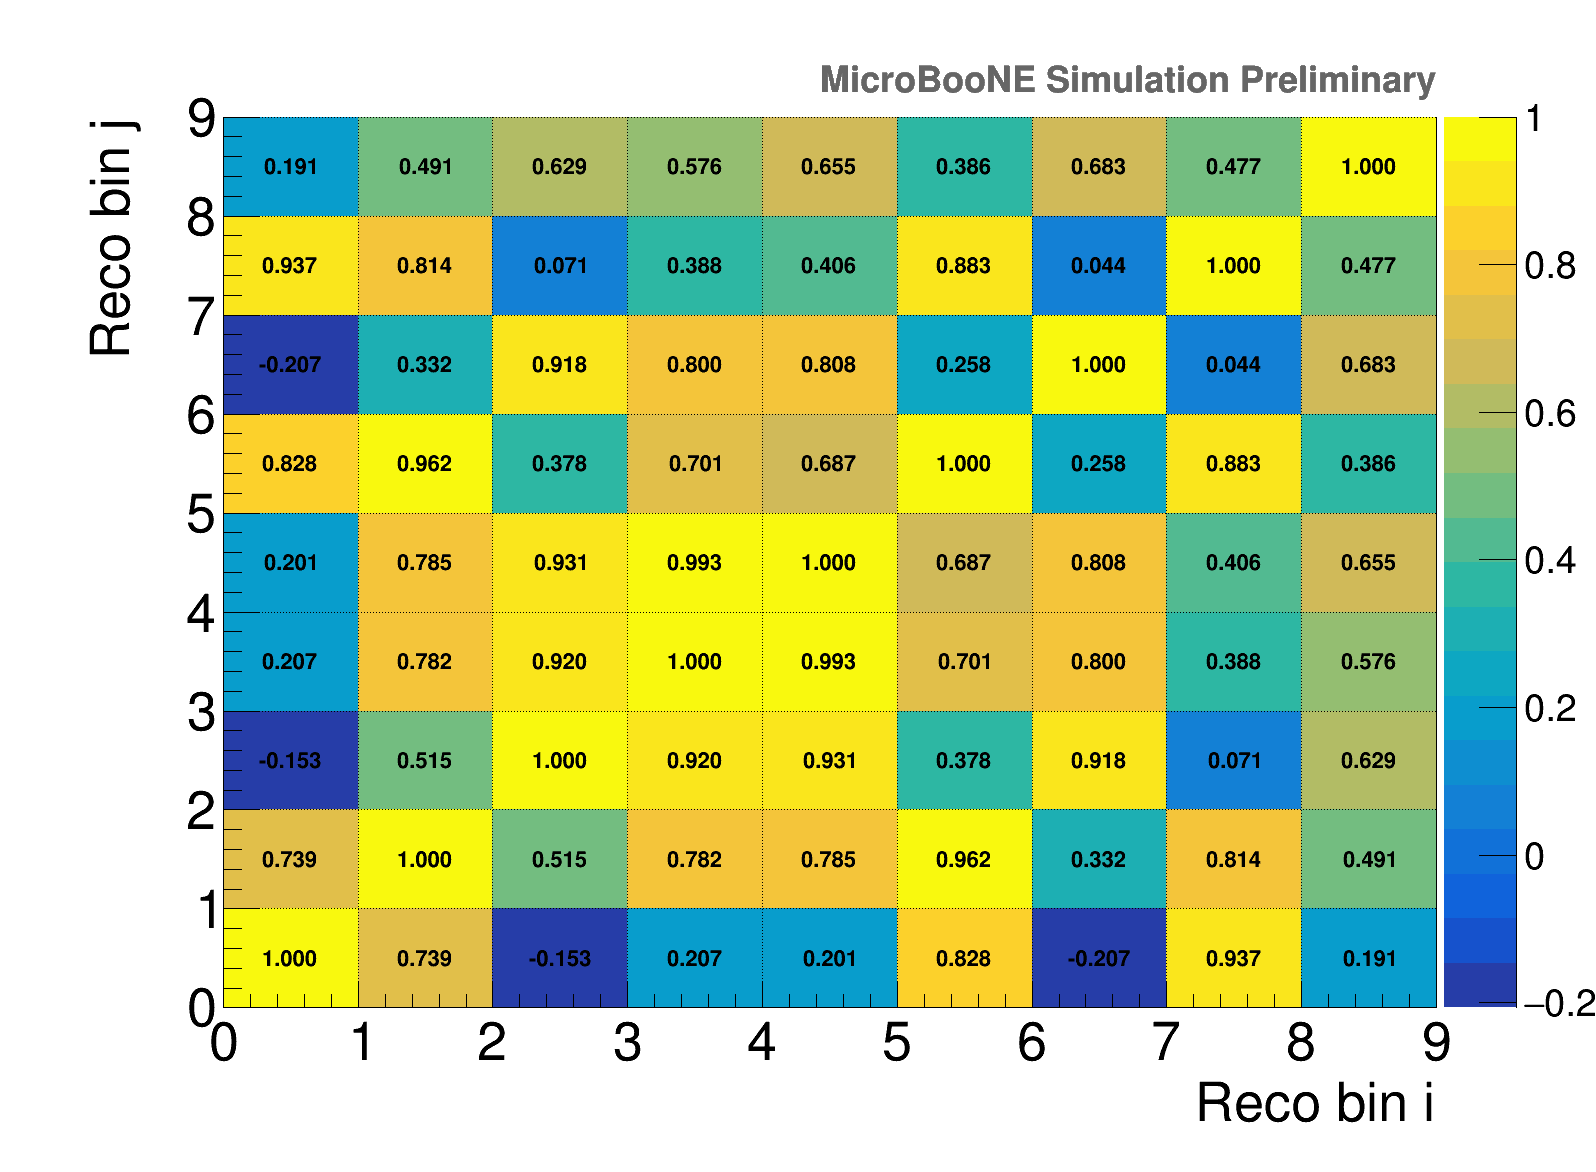

In [33]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',9,0,9,9,0,9)
for i in range(binnum):
    for j in range(binnum):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_correlation.SetMinimum(-1)
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_genie_other_theta.png")
c1.SaveAs(outputdir_root + "h_correlation_genie_other_theta.root")
c1.SaveAs(outputdir_pdf + "h_correlation_genie_other_theta.pdf")
h_correlation.Write('h_correlation')

In [34]:
for para in range(num_para):
    for uni in range(num_universes):   
        print ''
        h_1d_xsec[para][uni].Scale(1e38)
h_cv.Scale(1e38)

0.284610152245  -  16.7002868652
0.284457147121  -  16.7264976501
0.285090118647  -  16.8212432861
0.284457147121  -  16.7264976501
0.282056301832  -  17.2393493652
0.286946833134  -  16.194726944
0.279726624489  -  17.4584541321
0.284457147121  -  16.7264976501
0.285371482372  -  16.5996685028
0.284457147121  -  16.7264976501


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_1d_xsec_genie_other_theta_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_1d_xsec_genie_other_theta_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_1d_xsec_genie_other_theta_stat.pdf has been created


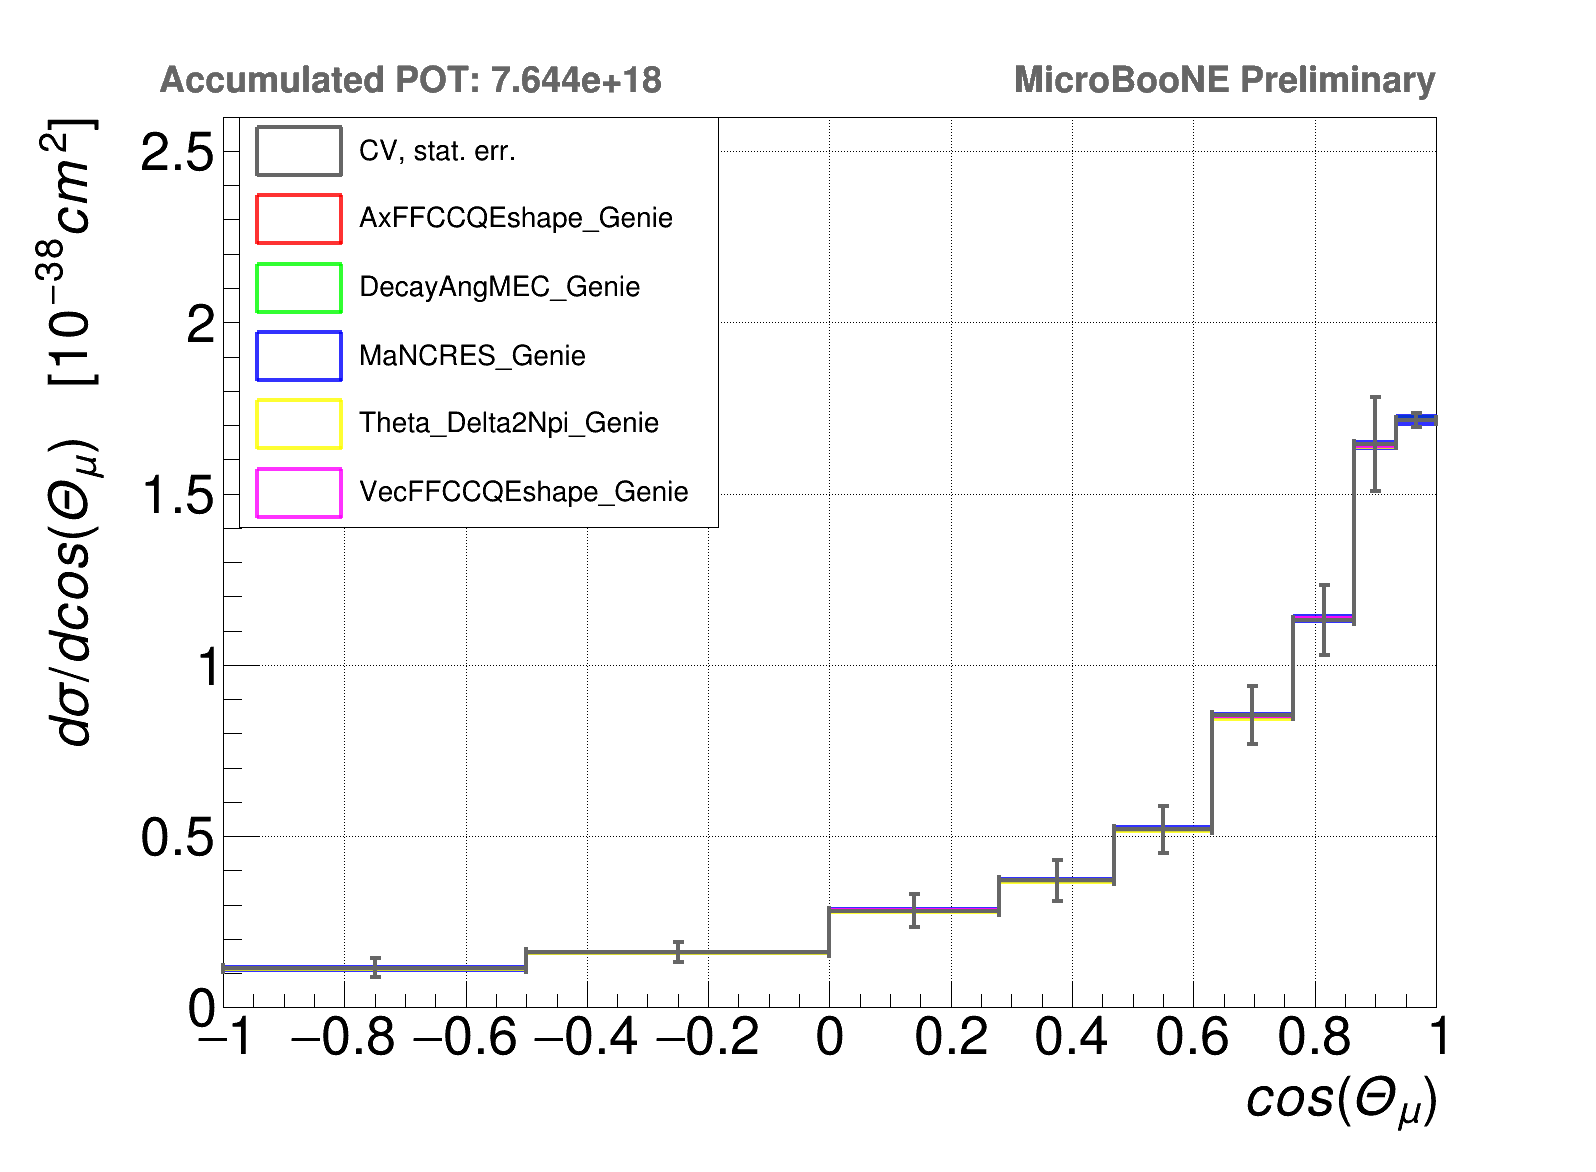

In [43]:

h_cv.SetLineWidth(3)
h_cv.SetMaximum(2.6)
h_cv.SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_cv.SetXTitle("cos(\Theta_{\mu})")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
c1.SetRightMargin(0.1)
#h_covariance.SetLineColor(ROOT.kBlack)
h_cv.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
h_cv.Draw('HIST')
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
legend.AddEntry(h_cv,'CV, stat. err.',"f")
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(num_universes):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(2.6)
        h_1d_xsec[para][uni].SetLineColorAlpha(para+2,0.8)
        h_1d_xsec[para][uni].SetLineWidth(4)
        print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
h_cv.Draw('HIST E1 same')
h_stat = h_cv.Clone()
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_genie_other_theta_stat.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_genie_other_theta_stat.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_genie_other_theta_stat.pdf")


0.11613022536 0.00926793902002
0.16115437448 0.004086920448
0.282616406679 0.00765867698974
0.37109747529 0.0083380657484
0.519815325737 0.0100208543771
0.852682828903 0.0125055463023
1.13151288033 0.0172511280229
1.64396047592 0.0177093513554
1.71387732029 0.020227565179


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_1d_xsec_genie_other_theta_sys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_1d_xsec_genie_other_sys_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_1d_xsec_genie_other_theta_sys.pdf has been created


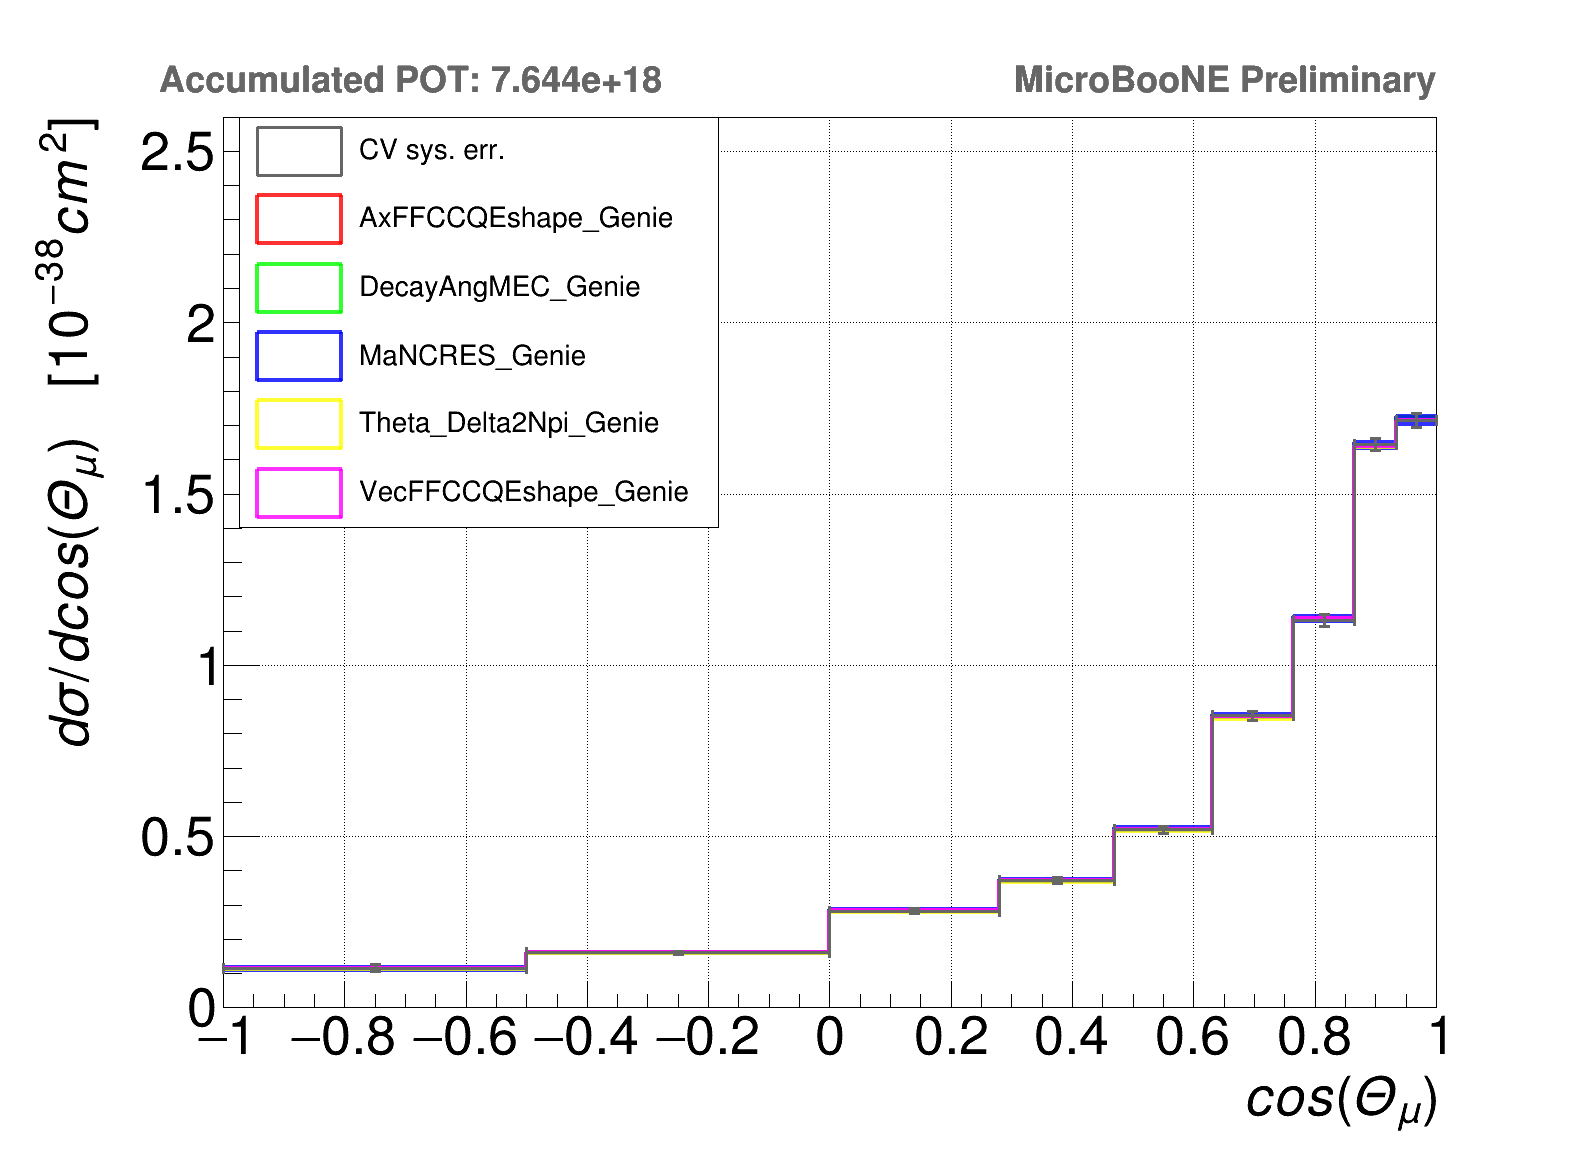

In [44]:
h_cv.SetLineWidth(3)
h_cv.SetMaximum(2.6)
h_cv.SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_cv.SetXTitle("cos(\Theta_{\mu})")
h_cv.Draw('HIST')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
legend.AddEntry(h_cv,'CV sys. err.',"f")
for para in range(num_para):
    for uni in range(num_universes):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(2.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i])*1e38)
    print h_cv.GetBinContent(i+1), h_cv.GetBinError(i+1)
h_cv.Draw('HIST E1 same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_genie_other_theta_sys.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_genie_other_sys_theta.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_genie_other_theta_sys.pdf")


0.11613022536 0.00926793902002
0.16115437448 0.004086920448
0.282616406679 0.00765867698974
0.37109747529 0.0083380657484
0.519815325737 0.0100208543771
0.852682828903 0.0125055463023
1.13151288033 0.0172511280229
1.64396047592 0.0177093513554
1.71387732029 0.020227565179


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_xsec_detsys_theta_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_xsec_detsys_theta_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_xsec_detsys_theta_errdetsys_ratio.root has been created


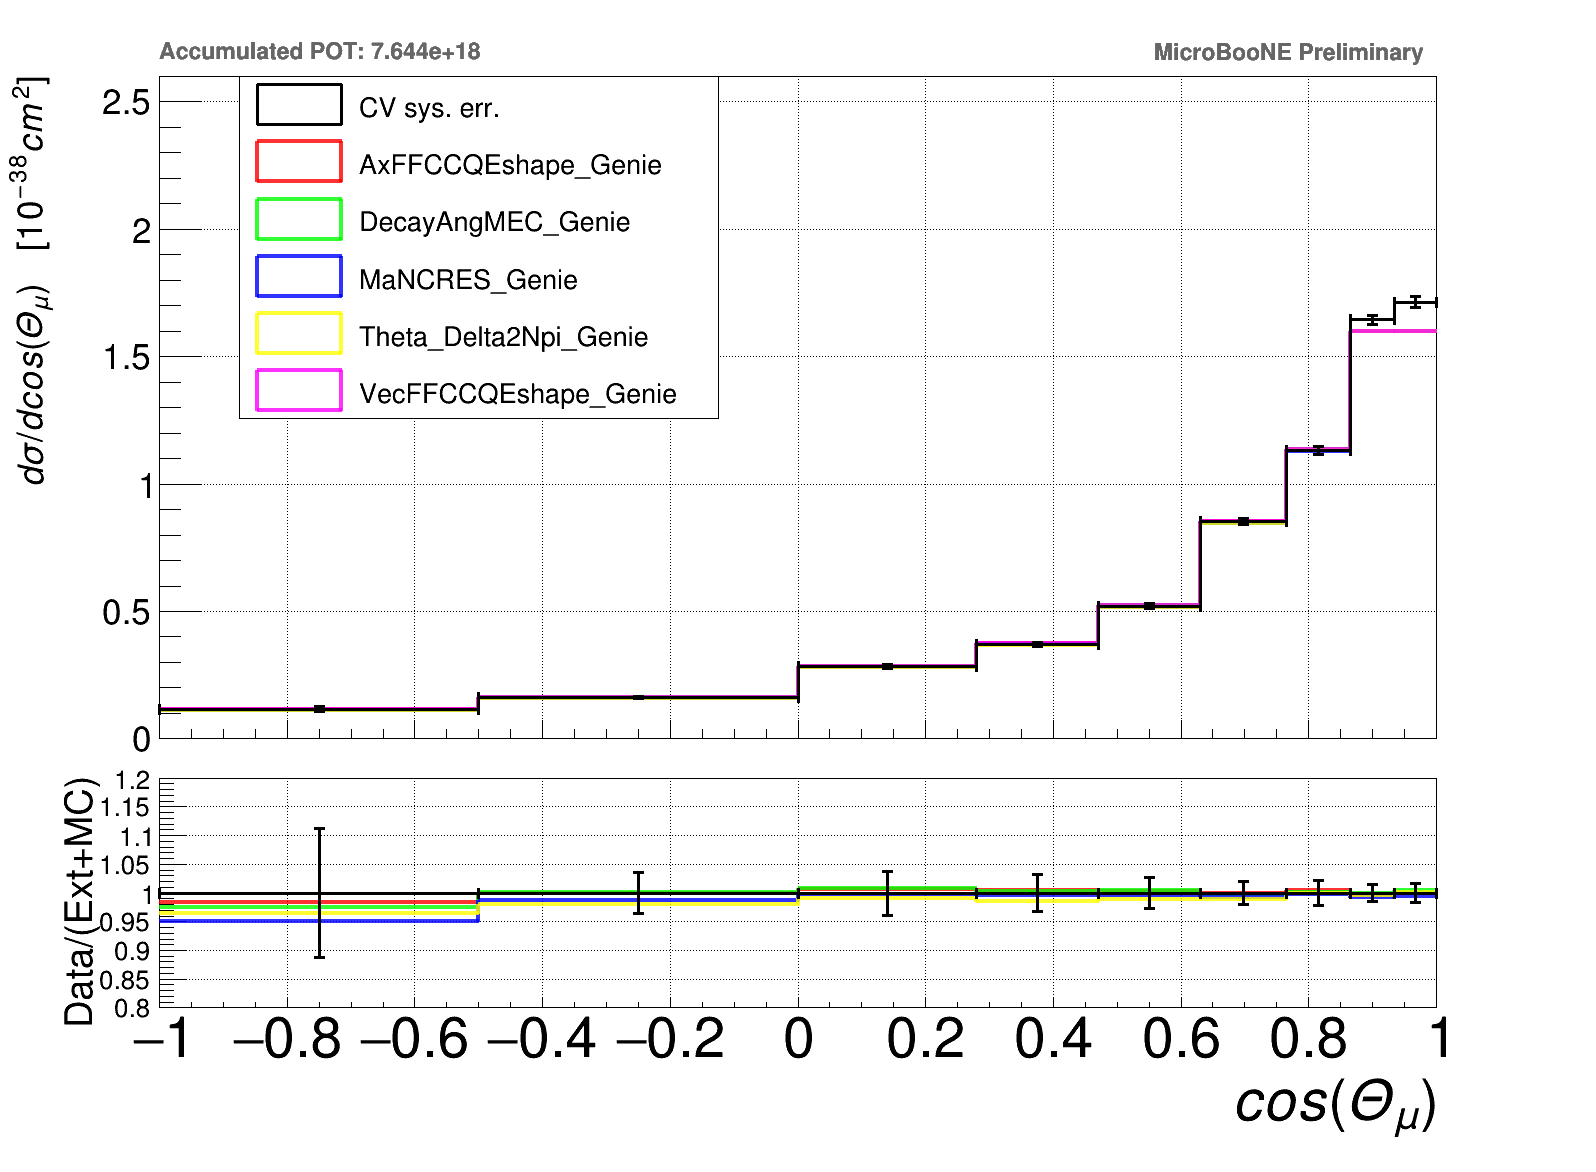

In [37]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

#h_cv.SetLineWidth(3)
#h_cv.SetMaximum(1.6)
#h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
#h_cv.SetXTitle("p_{\mu} [GeV]")
h_cv.GetXaxis().SetLabelOffset(999);
h_cv.GetXaxis().SetTitleOffset(999);
h_cv.GetXaxis().SetLabelSize(0);
h_cv.GetXaxis().SetTitleSize(0);
h_cv.Draw('HIST')
legend = ROOT.TLegend(0.15,0.45,0.45,0.9); #LEGEND LEFT
legend.AddEntry(h_cv,'CV sys. err.',"f")
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(1):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i])*1e38)
    print h_cv.GetBinContent(i+1), h_cv.GetBinError(i+1)
h_cv.Draw('HIST E1 same')

c1.cd()
h_cv.GetXaxis().SetLabelOffset(0);
h_cv.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
i = 0
h_files2.append(h_cv.Clone())
h_files2[i].SetYTitle('Data/(Ext+MC)')
h_files2[i].GetYaxis().SetTitleSize(0.1)
h_files2[i].GetYaxis().SetTitleOffset(0.3)
h_files2[i].GetYaxis().SetLabelSize(0.07)

h_files2[i].GetXaxis().SetTitleSize(0.15)
h_files2[i].GetXaxis().SetLabelSize(0.15)
h_files2[i].GetXaxis().SetTitleOffset(1)
h_files2[i].SetMinimum(0.8)
h_files2[i].SetMaximum(1.2)
h_files2[i].Draw('hist')
for para in range(num_para):
    for uni in range(1):   
        h_files2.append(h_1d_xsec[para][uni].Clone())
        h_files2[i].Divide(h_cv)
        h_files2[i].Draw('hist same')
        i+=1

h_files2[0].Draw('E1 same')
c1.Draw()
#del h_files2[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_errdetsys_ratio.root")

#h_files.clear()

In [38]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_xsec_genie_other_theta_tot_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_xsec_genie_other_theta_tot_error.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_xsec_genie_other_theta_tot_error.pdf has been created


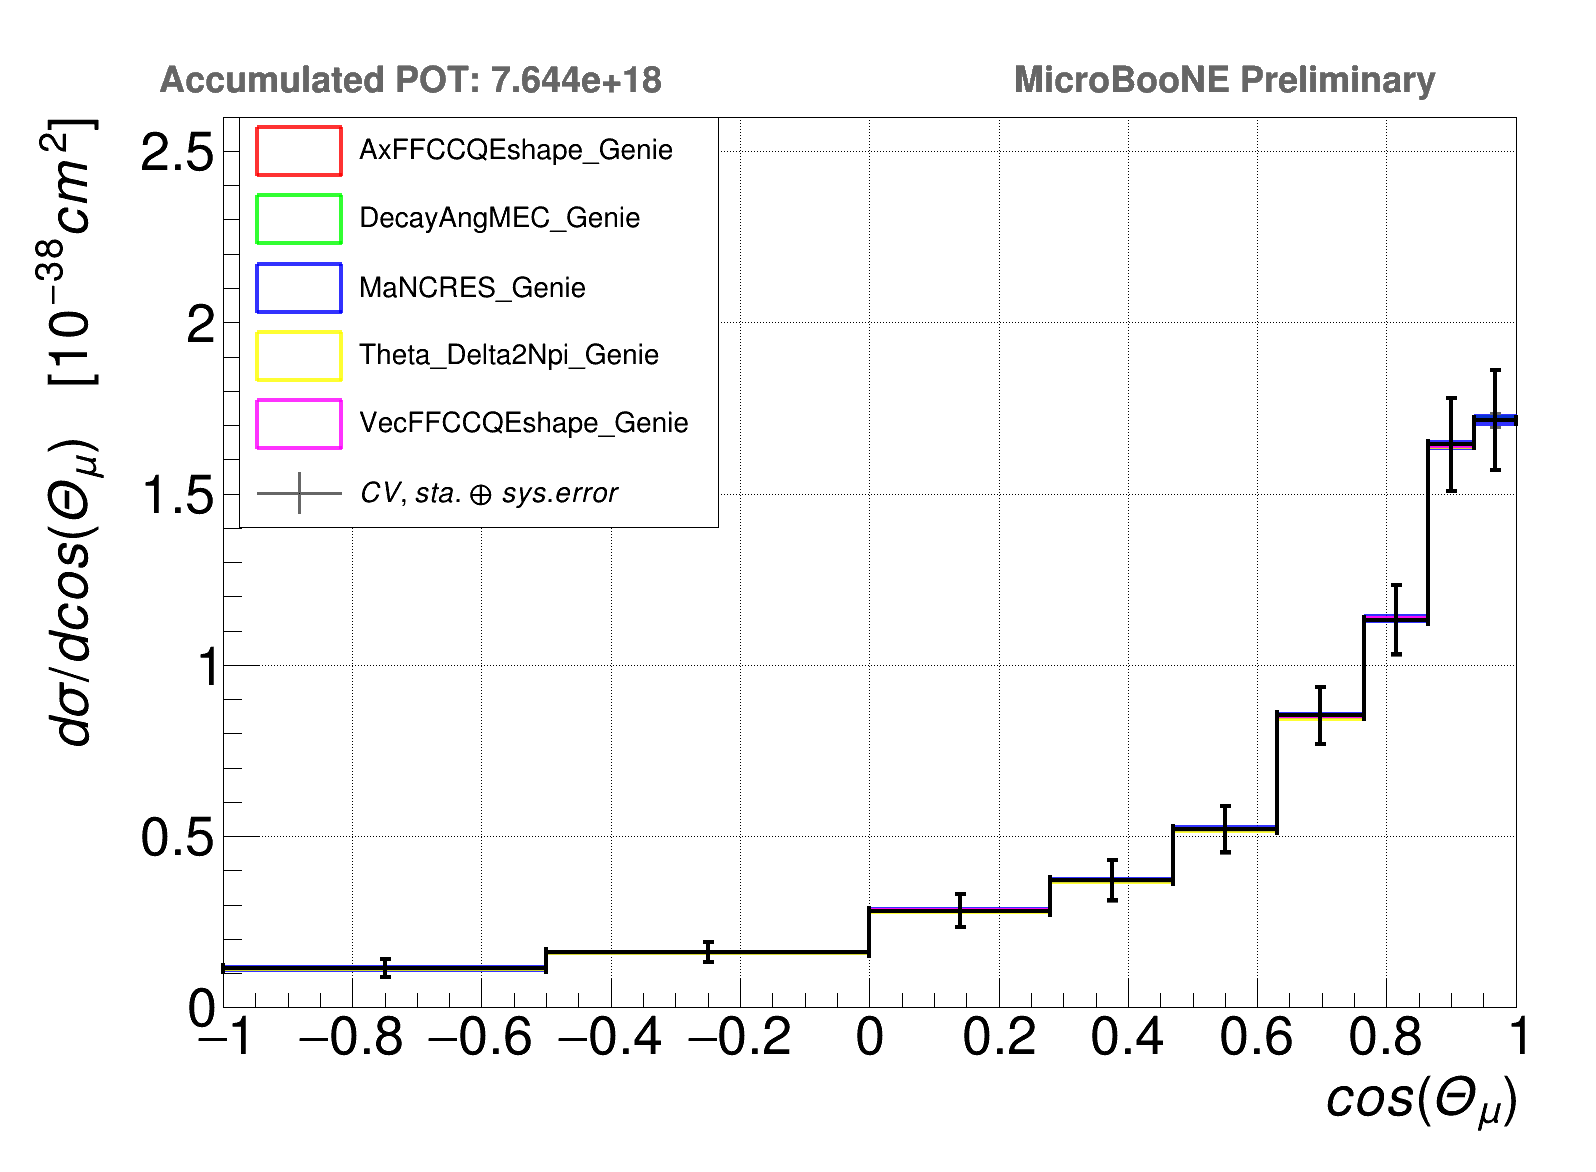

In [39]:
#with sys error
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
h_cv.GetXaxis().SetLabelSize(0.05);
h_cv.GetXaxis().SetTitleSize(0.05);
h_cv.GetXaxis().SetLabelOffset(0);
h_cv.GetXaxis().SetTitleOffset(1);
h_cv.SetYTitle("d\sigma / d cos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_cv.SetXTitle("cos(\Theta_{\mu})")
h_cv.Draw('hist')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(num_universes):
        h_1d_xsec[para][uni].SetMaximum(2.6)
        #h_1d_xsec[para][uni].SetLineColorAlpha(ROOT.kRed,0.6)
        h_1d_xsec[para][uni].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
        h_1d_xsec[para][uni].SetXTitle("p_{\mu} [GeV]")
        h_1d_xsec[para][uni].Draw('hist same')
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
for i in range(binnum):
    h_cv.SetBinError(i,math.sqrt(xsec_cov_matrix[i][i]*1e76+math.pow(h_stat.GetBinError(i),2)))
h_cv.SetLineColor(ROOT.kGray+2)
#legend.AddEntry(h_xsec[0],'All Genie                 ',"f")
legend.AddEntry(h_cv,'CV, sta. \oplus sys. error',"lep")
#legend.AddEntry(h_stat,'CV, stat. error',"lep")
legend.Draw()
h_cv.Draw('hist E1 same') 
h_stat.SetLineColor(ROOT.kBlack)
h_stat.Draw('hist E1 same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_genie_other_theta_tot_error.png")
c1.SaveAs(outputdir_root + "h_xsec_genie_other_theta_tot_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_genie_other_theta_tot_error.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_eff_tilde_genie_other_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_eff_tilde_genie_other_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_eff_tilde_genie_other_theta.pdf has been created


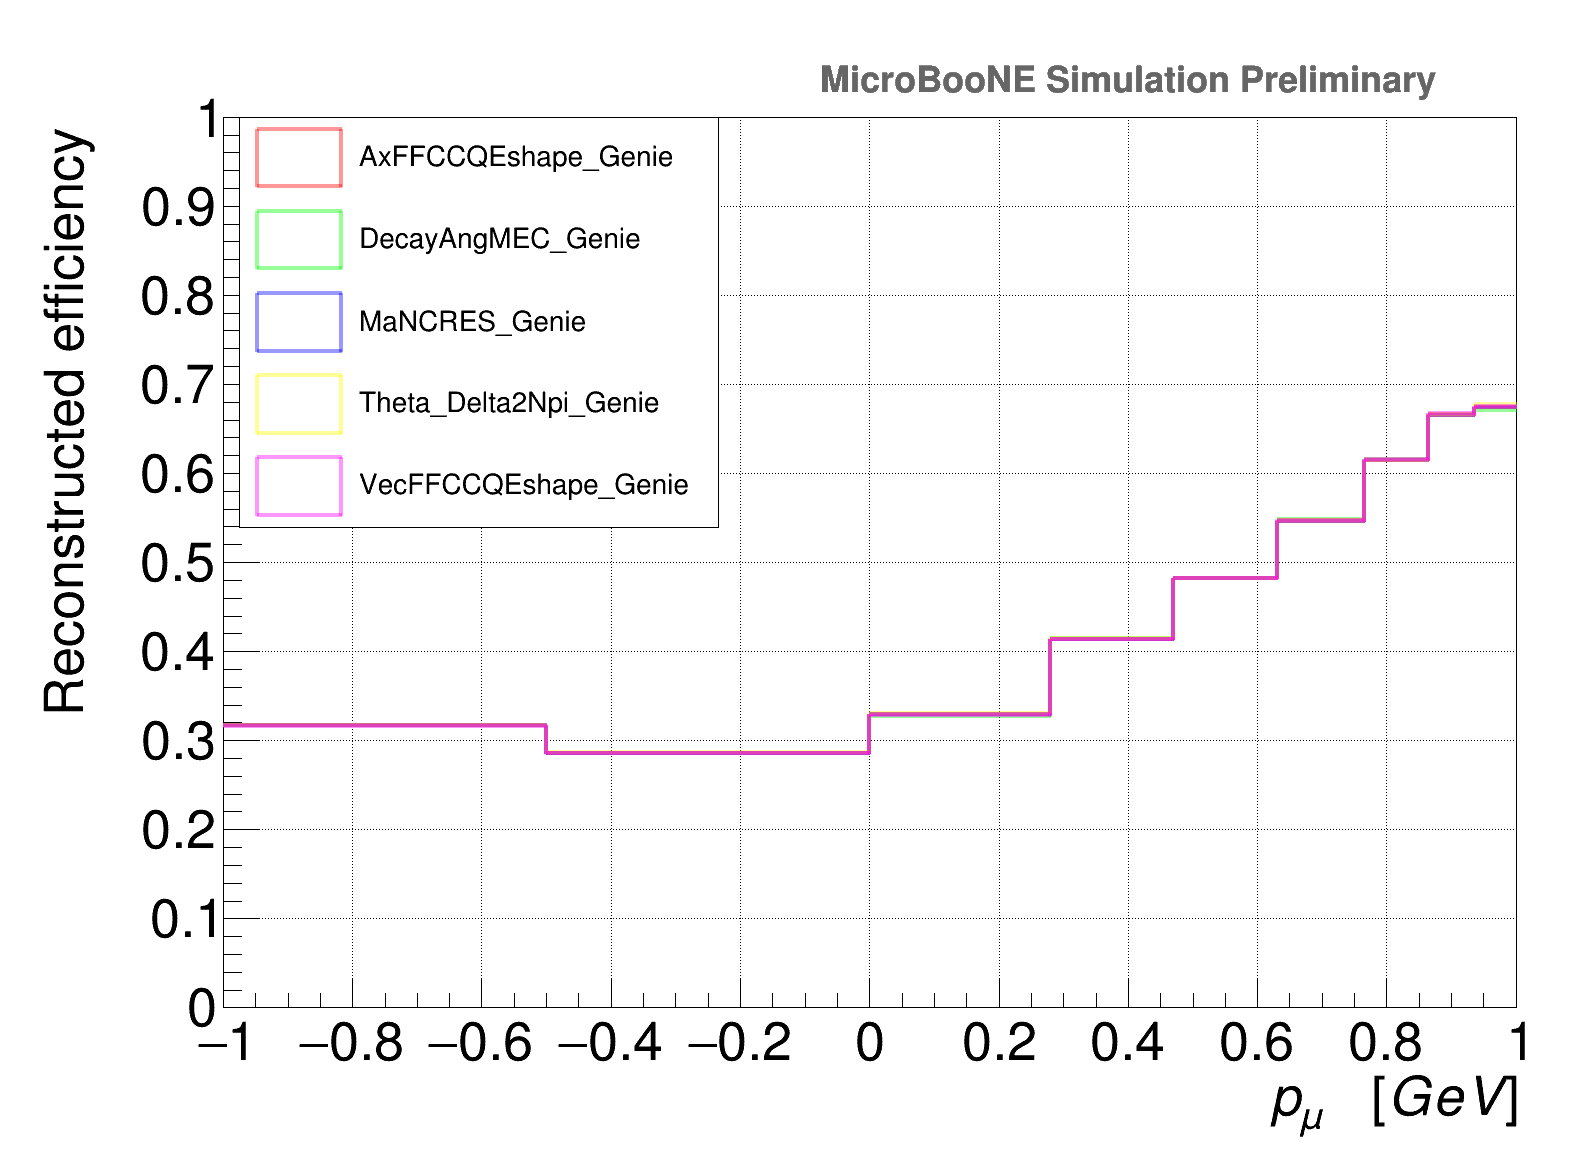

In [40]:
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
for para in range(num_para):
    for uni in range(num_universes):        
        h_eff_tilde[para][uni].SetMaximum(1)
        h_eff_tilde[para][uni].SetMinimum(0)
        h_eff_tilde[para][uni].SetLineColorAlpha(para+2,0.4)
        h_eff_tilde[para][uni].SetLineWidth(3)
        h_eff_tilde[para][uni].SetYTitle("Reconstructed efficiency")
        h_eff_tilde[para][uni].SetXTitle("p_{\mu} \t [GeV]")
        h_eff_tilde[para][uni].GetYaxis().SetTitleSize(0.05)
        h_eff_tilde[para][uni].GetYaxis().SetTitleOffset(0.0)
        h_eff_tilde[para][uni].GetYaxis().SetLabelSize(0.05)
        h_eff_tilde[para][uni].GetXaxis().SetTitleSize(0.05)
        h_eff_tilde[para][uni].GetXaxis().SetLabelSize(0.05)
        h_eff_tilde[para][uni].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_eff_tilde[para][uni].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        if(para == 0 and uni==0):
            h_eff_tilde[para][uni].Draw('HIST')
        else:
            h_eff_tilde[para][uni].Draw('HIST same ')

    legend.AddEntry(h_eff_tilde[para][uni],weight_list_flux[para],"f")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_genie_other_theta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_genie_other_theta.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_genie_other_theta.pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/png/h_eff_true_genie_other_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/root/h_eff_true_genie_other_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_theta_genie_other/pdf/h_eff_true_genie_other_theta.pdf has been created


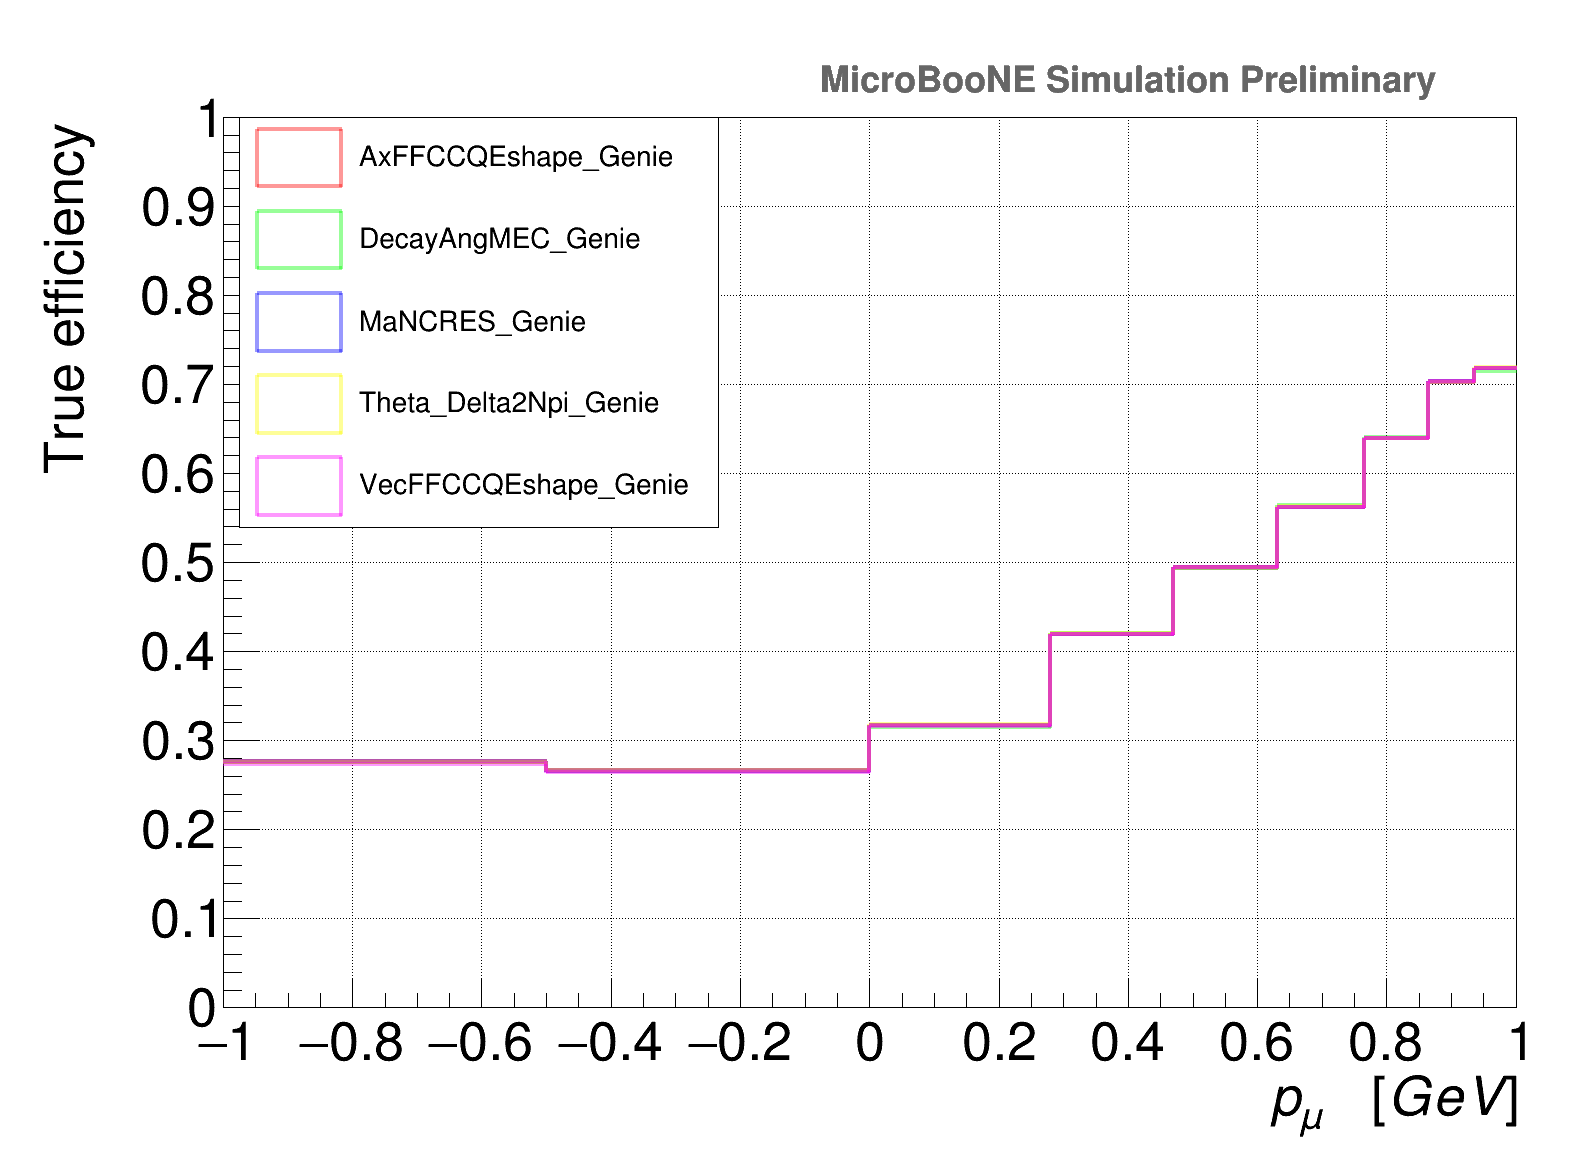

In [41]:
legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND LEFT
for para in range(num_para):
    for uni in range(num_universes):        
        h_eff_true[para][uni].SetMaximum(1)
        h_eff_true[para][uni].SetMinimum(0)
        h_eff_true[para][uni].SetLineColorAlpha(para+2,0.4)
        h_eff_true[para][uni].SetLineWidth(3)
        h_eff_true[para][uni].SetYTitle("True efficiency")
        h_eff_true[para][uni].SetXTitle("p_{\mu} \t [GeV]")
        h_eff_true[para][uni].GetYaxis().SetTitleSize(0.05)
        h_eff_true[para][uni].GetYaxis().SetTitleOffset(0.0)
        h_eff_true[para][uni].GetYaxis().SetLabelSize(0.05)
        h_eff_true[para][uni].GetXaxis().SetTitleSize(0.05)
        h_eff_true[para][uni].GetXaxis().SetLabelSize(0.05)
        h_eff_true[para][uni].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_eff_true[para][uni].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        if(para == 0 and uni==0):
            h_eff_true[para][uni].Draw('HIST')
        else:
            h_eff_true[para][uni].Draw('HIST same ')

    legend.AddEntry(h_eff_true[para][uni],weight_list_flux[para],"f")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_genie_other_theta.png")
c1.SaveAs(outputdir_root + "h_eff_true_genie_other_theta.root")
c1.SaveAs(outputdir_pdf + "h_eff_true_genie_other_theta.pdf")


In [42]:
# close the root file with all the histos
RootFile.Close()